# Multiple sequence alignment

In [1]:
import fem
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys, os, time, pickle
sys.path.append('../../scripts')
data_dir = '../../../data/msa'

[parse Pfam data](../scripts/parse_pfam.py)

In [2]:
from parse_pfam import parse_pfam
pf, pf_info, pdbmap = parse_pfam(data_dir=data_dir)

In [3]:
pf[:10]

array(['PF10417.8', 'PF12574.7', 'PF09847.8', 'PF00244.19', 'PF16998.4',
       'PF00389.29', 'PF02826.18', 'PF00198.22', 'PF16078.4',
       'PF04029.13'], dtype='|S10')

In [4]:
pf_info.head()

i min_m max_m   res    seq
PF10417.8   0     2    21   109   5754
PF12574.7   1     1     6   325      7
PF00244.19  3     2    22   874   3543
PF00389.29  5     2    22  1437  19205
PF02826.18  6     1    22  1143  23448

In [5]:
pdbmap.head()

chain    ?  name       pf          id     res
pdbid                                              
3H3M      B  nan  FliT  PF05400  A0A0H3LVQ9  34-106
3H3M      A  nan  FliT  PF05400  A0A0H3LVQ9  34-106
3NKZ      C  nan  FliT  PF05400      A1JSR8   21-92
3NKZ      B  nan  FliT  PF05400      A1JSR8   21-94
3NKZ      D  nan  FliT  PF05400      A1JSR8   21-93

In [6]:
# # random pdb
# pdb = pdbmap.sample()
# pfam = pf_info[pf_info.index.str.contains(pdb['pf'][0])]
# Cas 9 family
pfam = pf_info[pf_info.index.str.contains('PF16592')]
pfam

i min_m max_m   res  seq
PF16592.4  1486     2    21  1079  146

In [7]:
pf_dir = os.path.join(data_dir, 'Pfam', pfam.index[0])
msa = np.load(os.path.join(pf_dir, 'msa.npy'))

In [8]:
# number of AAs that occur at each residue
m = np.array([len(np.unique(s)) for s in msa])
# filter out residues that less than 3 AAs
active_residues = m > 1
msa = msa[active_residues]
# data dimensions
n, l = msa.shape
print 'sequence length (n): %i, number of sequences (l): %i' % (n, l)
# elements of data matrix
print 'AAs: %s' % (np.unique(msa),)

sequence length (n): 1079, number of sequences (l): 146
AAs: ['-' 'a' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'k' 'l' 'm' 'n' 'p' 'q' 'r' 's' 't'
 'v' 'w' 'y']


In [9]:
w_file = os.path.join(pf_dir, 'w.npy')
d_file = os.path.join(pf_dir, 'd.pkl')

if os.path.exists(w_file) and os.path.exists(d_file):
    w = np.load(w_file)
    with open(d_file, 'rb') as f:
        d = pickle.load(f)
else:
    start = time.time()
    w, d = fem.discrete.fit.fit(msa, degs=[1], iters=10)
    end = time.time()
    w = w[1]
    np.save(w_file, w)
    with open(d_file, 'wb') as f:
        pickle.dump(d, f)
    print '%02f seconds' % (end-start,)

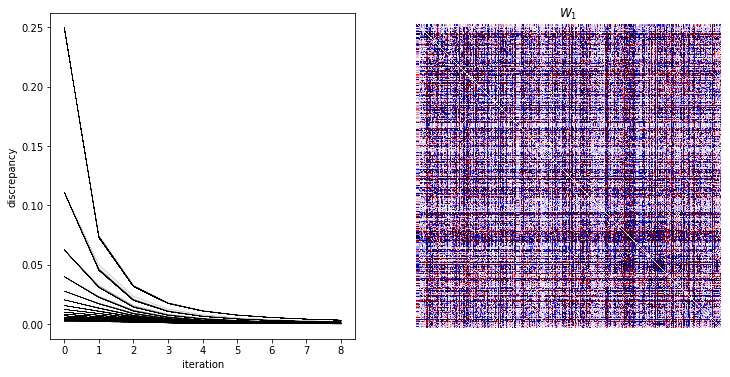

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for di in d:
    ax[0].plot(di, 'k-', lw=0.1)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('discrepancy')

scale = 1e-2 * np.abs(w).max()

ax[1].imshow(w, aspect='equal', cmap=plt.cm.seismic, vmin=-scale, vmax=scale)
ax[1].axis('off')
ax[1].set_title('$W_1$')

plt.savefig(os.path.join(pf_dir, 'fit.png'))
plt.show()

In [11]:
pdbmap[pdbmap['pf'].str.contains('PF16592')]

chain    ?      name       pf      id      res
pdbid                                               
5FQ5      B  nan  Cas9_REC  PF16592  Q99ZW2  181-712
5FW3      B  nan  Cas9_REC  PF16592  Q99ZW2  181-712
4CMP      A  nan  Cas9_REC  PF16592  Q99ZW2  181-712
4UN3      B  nan  Cas9_REC  PF16592  Q99ZW2  181-710
5B2R      B  nan  Cas9_REC  PF16592  Q99ZW2  184-712
4ZT9      C  nan  Cas9_REC  PF16592  Q99ZW2  181-712
4OO8      D  nan  Cas9_REC  PF16592  Q99ZW2  181-712
5F9R      B  nan  Cas9_REC  PF16592  Q99ZW2  181-712
4ZT0      A  nan  Cas9_REC  PF16592  Q99ZW2  181-712
4OO8      A  nan  Cas9_REC  PF16592  Q99ZW2  181-712
5FW2      B  nan  Cas9_REC  PF16592  Q99ZW2  181-712
5FW1      B  nan  Cas9_REC  PF16592  Q99ZW2  181-710
4CMQ      A  nan  Cas9_REC  PF16592  Q99ZW2  181-712
4CMQ      B  nan  Cas9_REC  PF16592  Q99ZW2  181-712
5B2S      B  nan  Cas9_REC  PF16592  Q99ZW2  184-712
4CMP      B  nan  Cas9_REC  PF16592  Q99ZW2  181-712
5B2T      B  nan  Cas9_REC  PF16592  Q99ZW2  181-712
4UN5      B  nan  Cas9_REC  PF16592  Q99ZW2  181-712
4ZT9      A  nan  Cas9_REC  PF16592  Q99ZW2  181-710
4UN4      B  nan  Cas9_REC  PF16592  Q99ZW2  181-712
4ZT0      C  nan  Cas9_REC  PF16592  Q99ZW2  181-712
5CZZ      A  nan  Cas9_REC  PF16592  J7RUA5  224-428
5AXW      A  nan  Cas9_REC  PF16592  J7RUA5  224-428

In [12]:
import pymol

In [20]:
dir(pymol)
? pymol.cmd.save

In [14]:
pymol.cmd.set('grid_mode', 1)
# gird_slot

 PyMOL not running, entering library mode (experimental)


In [15]:
pymol.cmd.loadall(os.path.join(pf_dir, '*.cif'))

In [16]:
# pymol.cmd.png(filename = os.path.join(pf_dir, 'all.png'))
# pymol.cmd.save(filename = os.path.join(pf_dir, 'all.png'))

1

In [17]:
def plot_pdb(pdbid, pf_dir):
    pdbid = pdbid.lower()
    pymol.cmd.fetch(pdbid, path=pf_dir)
    pymol.cmd.load(filename = os.path.join(pf_dir, pdbid+'.cif'))
    pymol.cmd.png(filename = os.path.join(pf_dir, pdbid+'.png'))

pymol.cmd.extend('plot_pdb', plot_pdb)

# for pdbid in pdbmap[pdbmap['pf'].str.contains('PF16592')].index:
#     plot_pdb(pdbid, pf_dir)

<function __main__.plot_pdb>

In [18]:
# pymol -qcr <script.py>
# ftp://ftp.ebi.ac.uk/pub/databases/Pfam/releases/Pfam31.0/

In [19]:
# import Bio
# from Bio import SeqIO
# msa = Bio.SeqIO.parse(os.path.join(data_dir, 'PF16592_ncbi.txt'), 'fasta')
# msa = np.array([np.array(s.seq) for s in msa]).T